In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/home/aditya/Downloads/examples/User_Data.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit_transform(xtest)
print(xtrain[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[63  5]
 [ 8 24]]


In [15]:
from sklearn.metrics import accuracy_score,precision_score
print("Accuracy: ", accuracy_score(ytest, y_pred))
print("Precision: ",precision_score(ytest, y_pred))

Accuracy:  0.87
Precision:  0.8275862068965517


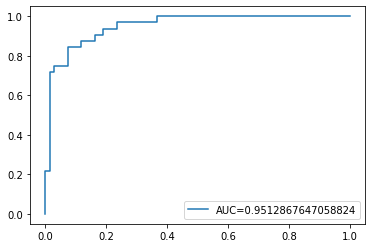

In [19]:
from sklearn import metrics
y_pred_proba = classifier.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [20]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
